In [1]:
import glob as gb
import os
import scipy.io
import numpy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from classes import CLASSES


In [2]:
mat_data = scipy.io.loadmat('imagelabels.mat')
print(mat_data.keys())

image = gb.glob('jpg/*.jpg')

dict_keys(['__header__', '__version__', '__globals__', 'labels'])


In [3]:
df = pd.DataFrame({"image" : image, "label" : mat_data['labels'][0]})
df["Class"] = df['label'].map(lambda x: CLASSES[x-1])

In [4]:
df.head()

,image,label,Class
0,jpg\image_00001.jpg,77,Passion Flower
1,jpg\image_00002.jpg,77,Passion Flower
2,jpg\image_00003.jpg,77,Passion Flower
3,jpg\image_00004.jpg,77,Passion Flower
4,jpg\image_00005.jpg,77,Passion Flower


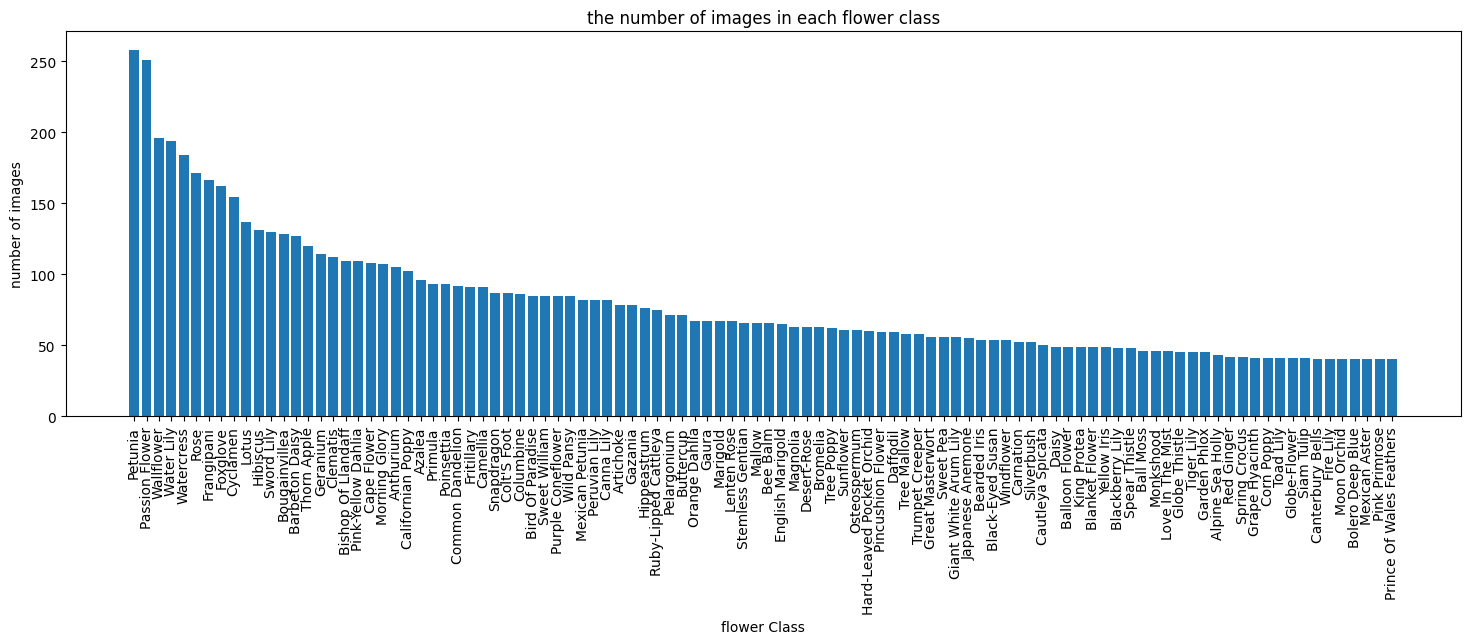

In [5]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(18, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('flower Class')
plt.xticks(rotation=90)
plt.ylabel('number of images')
plt.title('the number of images in each flower class')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_data = df[['image']]
y_data = df.label

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_data,y_data, train_size=0.8, random_state=88)

In [9]:
y_train = y_train.to_list()
x_train = x_train.image.to_list()

In [10]:
y_val = y_val.to_list()
x_val = x_val.image.to_list()

In [12]:
import shutil


# المجلد الذي سيتم نسخ الصور إليه
destination_folder = 'train'

# التأكد من وجود المجلد الهدف
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# الحصول على قائمة الملفات في المجلد الأصلي


# نسخ الملفات الصور إلى المجلد الهدف
for i in range(len(x_train)):
    
    folder_name = str(y_train[i])
    source_file = os.path.join(x_train[i])
    folder_path = os.path.join(destination_folder, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    destination_file = os.path.join(folder_path ,x_train[i].split('\\')[1])
    shutil.copyfile(source_file, destination_file)

print('Done')    


Done


In [13]:
# المجلد الذي سيتم نسخ الصور إليه
destination_folder = 'val'

# التأكد من وجود المجلد الهدف
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# الحصول على قائمة الملفات في المجلد الأصلي


# نسخ الملفات الصور إلى المجلد الهدف
for i in range(len(x_val)):
    
    folder_name = str(y_val[i])
    source_file = os.path.join(x_val[i])
    folder_path = os.path.join(destination_folder, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    destination_file = os.path.join(folder_path ,x_val[i].split('\\')[1])
    shutil.copyfile(source_file, destination_file)

print('Done') 

Done
